In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Regresión logística

La regresión logística es bastante similar a la regresión lineal. Básicamente es una regresión lineal con una función de activación al final que nos sirve para predecir una clase de otra.

Hay tres tipos de regresiones logísticas:

1. Regresión Logística Binaria: es la Regresión Logística clásica, en la que hay dos clases a predecir.
2. Regresión Logística Multinomial: hay más de dos categorías a predecir, pero las clases no guardan ningún orden entre ellas.
3. Regresión Logística Ordinal: hay más de dos categorías a predecir y existe un orden entre las categorías (por ejemplo predecir en que posición va a quedar cada equipo al final de la liga)


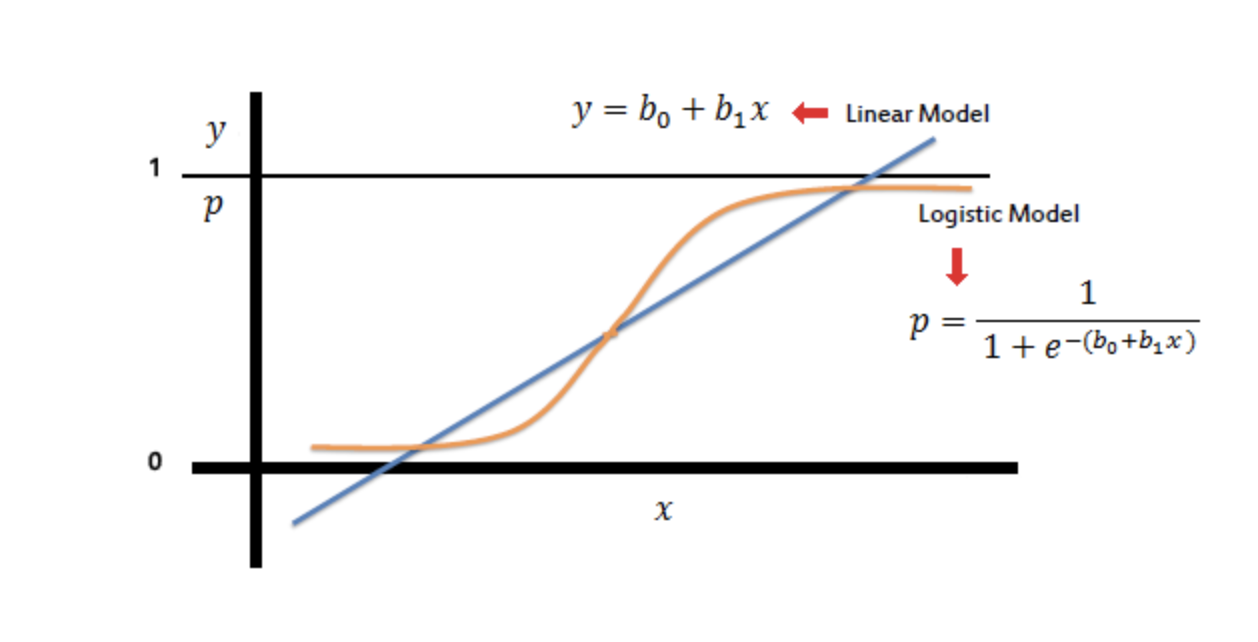

In [22]:
from IPython.display import Image
Image(filename='rl.png')

# La regresión logística en PLN

La clasificación es la tarea de asignar una etiqueta de clase a un punto de datos. Supongamos que tenemos un conjunto de imágenes que contienen perros y gatos. Dada una imagen, debemos decir si contiene un perro o un gato. Ésta es la tarea de la Clasificación. Otros ejemplos de clasificación incluyen

Clasificación de tumores como benignos o malignos
Clasificación de películas en acción, aventura y romance, etc.
Para el siguiente tutorial, tengamos las siguientes suposiciones. En aras de la simplicidad, asumimos que solo están presentes dos clases. Entonces empecemos. Primero, las entradas se multiplican por una matriz de pesos para obtener una salida escalar. La salida escalar resultante se envía a una función sigmoidea para obtener un valor entre 0 y 1.


Suponemos que la salida es la probabilidad del punto de datos perteneciente a la clase 1

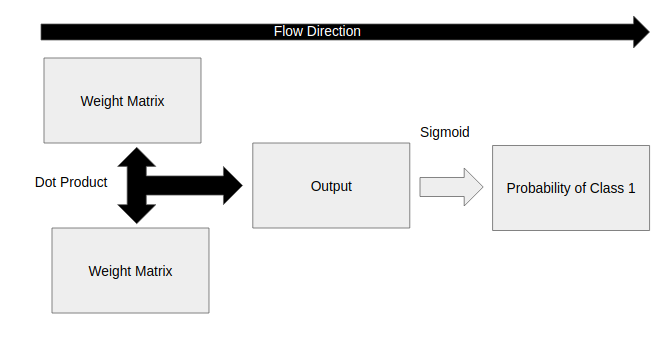

In [2]:
from IPython.display import Image
Image(filename='flow-regresion.png') 

# Función Sigmoide

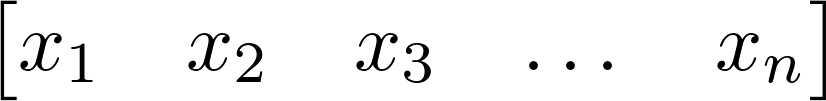

In [3]:
from IPython.display import Image
Image(filename='regre1.png')

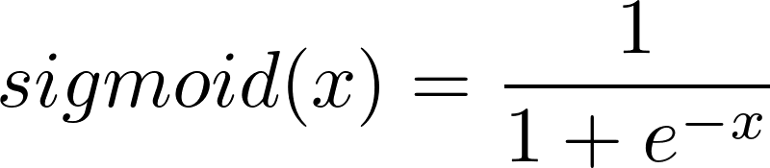

In [4]:
from IPython.display import Image
Image(filename='regre2.png')

In [5]:
def sigmoid(x):
    return 1.0/(1+np.exp(-x))

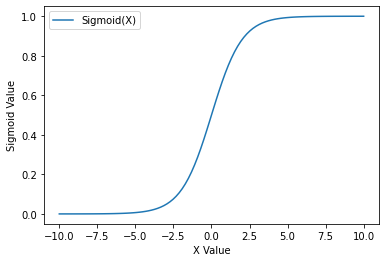

In [6]:
plt.figure()
x = np.linspace(-10,10,100)
plt.plot(x,sigmoid(x),label="Sigmoid(X)")
plt.xlabel("X Value")
plt.ylabel("Sigmoid Value")
plt.legend(loc=2)
plt.show()

Supongamos que la función sigmoidea genera una probabilidad de pertenecer a la clase 1. Entonces, si el valor de entrada de esta función es cada vez más positivo, entonces pertenece a la clase positiva. De lo contrario, pertenece a la clase negativa. Eso es todo para la función sigmoidea

# Multiplicación de pesos

Tenemos una matriz de peso, que se va a multiplicar por la entrada. Llamemos a este proceso multiplicación lineal.

In [7]:
def lin_mul(x,weights):
    return np.dot(x,weights)

# Función de costo

 ¡Okey! Ahora tenemos una predicción. ¿Qué tan acertados estamos? ¿Qué tan equivocados estamos? Para ello, necesitaremos una función de coste. Menor costo implicaba una mejor predicción. Más costo implica peor predicción

Dado que la función genera la probabilidad de un punto de datos que pertenece a una clase positiva, la función de costo dependerá de la probabilidad de salida. Nos vamos a encontrar con cuatro casos.

1. Clase positiva pronosticada como positiva (valor sigmoide alto) (bajo costo)
2. Clase negativa prevista como negativa (valor sigmoide bajo) (bajo costo)
3. Clase positiva pronosticada como negativa (valor sigmoide bajo) (costo alto)
4. Clase negativa prevista como positiva (valor sigmoide alto) (costo elevado)

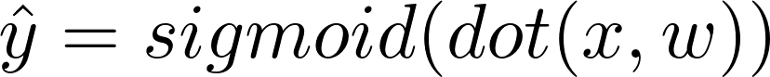

In [8]:
from IPython.display import Image
Image(filename='sigg.png')

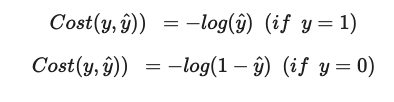

In [9]:
from IPython.display import Image
Image(filename='costo.png')

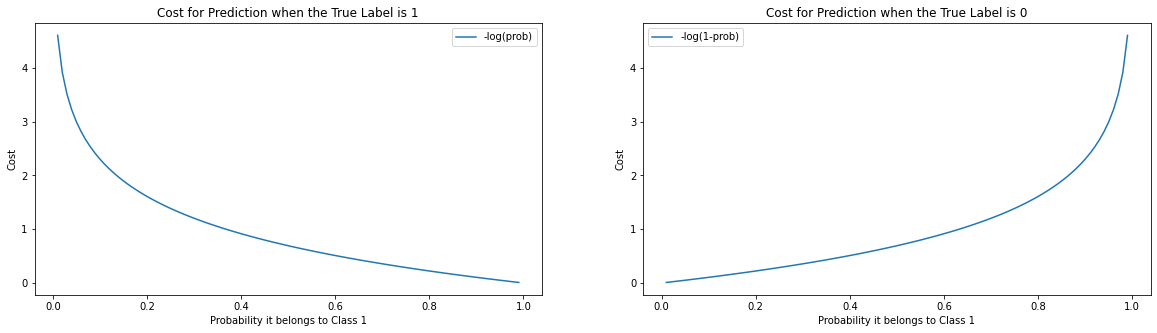

In [10]:
plt.close("all")
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
prob = np.linspace(0.01,.99,100)
plt.plot(prob,-np.log(prob),label="-log(prob)")
plt.title("Cost for Prediction when the True Label is 1")
plt.xlabel("Probability it belongs to Class 1")
plt.ylabel("Cost")
plt.legend()
plt.subplot(1,2,2)
prob = np.linspace(0.01,.99,100)
plt.plot(prob,-np.log(1-prob),label="-log(1-prob)")
plt.title("Cost for Prediction when the True Label is 0")
plt.xlabel("Probability it belongs to Class 1")
plt.ylabel("Cost")
plt.legend(loc=2)
plt.show()

¡El costo es bajo cuando la clase probable está cerca de sus etiquetas verdaderas!

Es alto cuando True Label no está cerca de la clase probable.



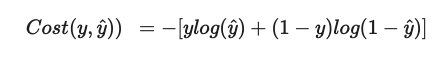

In [11]:
from IPython.display import Image
Image(filename='costo1.png')

# Preprocesamiento de los dataset; el conjunto de entrenamiento y el de testeo

In [12]:
def return_data(file_name):
    data = open(file_name).readlines()
    X = []
    y = []
    for i in data:
        X.append(i.lower().split(",")[0])
        y.append(int(i.split(",")[1]))
    
    return X,y

In [13]:
train_x,train_y = return_data('train_sentences.txt')
test_x,test_y = return_data('test.txt')

In [14]:
train_x,train_y

(['you are an idiot',
  'good morning idiot',
  'good morning buddy',
  'good morning stupid',
  'good morning man!',
  'you are amazing!'],
 [1, 1, 0, 1, 0, 0])

In [15]:
test_x,test_y

(['you are a stupid',
  'good night idiot',
  'good night buddy',
  'good night stupid',
  'you are my buddy'],
 [1, 1, 0, 1, 0])

# Vectoriación de los conjuntos de entrenamiento y de testeo

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
train_x = vectorizer.fit_transform(train_x).toarray()
test_x = vectorizer.transform(test_x).toarray()

In [27]:
print(train_x)

[[0 1 1 0 0 1 0 0 0 1]
 [0 0 0 0 1 1 0 1 0 0]
 [0 0 0 1 1 0 0 1 0 0]
 [0 0 0 0 1 0 0 1 1 0]
 [0 0 0 0 1 0 1 1 0 0]
 [1 0 1 0 0 0 0 0 0 1]]


In [26]:
print(test_x)

[[0 0 1 0 0 0 0 0 1 1]
 [0 0 0 0 1 1 0 0 0 0]
 [0 0 0 1 1 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 1 0]
 [0 0 1 1 0 0 0 0 0 1]]


# Definición de parámetros

In [17]:
lr = 0.001
n_epochs = 10000

In [18]:
weights_vector = np.random.random(train_x.shape[1])

In [19]:
def cost_function(pred,truth):
    return -truth*np.log(pred) - (1-truth)*np.log(1-pred)

In [20]:
for ep in range(n_epochs):
    avg_cost = 0
    for i in range(len(train_x)):
        data_point = train_x[i]
        # Esta es la etiquueta gold o true
        label  = train_y[i]
        #Este es la etiqueta predicha
        pred_prob = sigmoid(lin_mul(weights_vector,data_point))
       # cálculo de la función de pérdida o función de costo 
        avg_cost += cost_function(pred_prob,label)
        #actualización de la matriz de pesos de acuerdo a la tolerancia lr
        weights_vector = weights_vector - lr*(pred_prob - label)* data_point
    if ep%100==0:
        print ("Epoch {} has finished. Error is {}".format(ep+1,avg_cost/4.0))
        

Epoch 1 has finished. Error is 1.151678317986661
Epoch 101 has finished. Error is 1.0726316008838377
Epoch 201 has finished. Error is 1.0051695965563794
Epoch 301 has finished. Error is 0.9466962143839072
Epoch 401 has finished. Error is 0.8952446535420943
Epoch 501 has finished. Error is 0.8493685650975457
Epoch 601 has finished. Error is 0.8080144076841205
Epoch 701 has finished. Error is 0.7704104495481878
Epoch 801 has finished. Error is 0.7359820576560784
Epoch 901 has finished. Error is 0.7042913488715767
Epoch 1001 has finished. Error is 0.6749957784300777
Epoch 1101 has finished. Error is 0.6478202450672741
Epoch 1201 has finished. Error is 0.6225384055691557
Epoch 1301 has finished. Error is 0.5989601054991524
Epoch 1401 has finished. Error is 0.5769228209175972
Epoch 1501 has finished. Error is 0.5562857213256607
Epoch 1601 has finished. Error is 0.5369254518647147
Epoch 1701 has finished. Error is 0.518733054252024
Epoch 1801 has finished. Error is 0.5016116535750444
Epoch 1

In [21]:
preds = np.where(sigmoid(lin_mul(test_x,weights_vector))>.5,1,0)
print (preds)

[1 1 0 1 0]
